In [13]:
import pandas as pd

In [14]:
df_tnm = pd.read_csv("../data/gsea_luad_cleaned_TNM.csv")
df_mrna = pd.read_csv("../data/gsea_luad_cleaned_mrna.csv")

In [15]:
df = df_mrna.merge(df_tnm, on="Samples")
df.head()

,UBE2Q2P2,HMGB1P1,RNU12-2P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SDR16C6P,HSPB1P1,ANKRD20A20P,...,HAUS5,HAUS6,HAUS7,HAUS8,HAVCR1,HAVCR2,Samples,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Tumor Stage Code
0,0.155545,-0.183343,1.656730,-0.926965,0.238658,0.019828,-0.513754,-0.358142,-1.157295,0.315175,...,-1.520654,-0.501800,-0.340910,0.732916,-0.465771,0.464493,TCGA-05-4249-01,M0,N0,T2
1,-0.441380,-0.463648,0.450208,1.794997,0.333406,-0.217415,1.487931,-0.358142,-0.073914,-0.798883,...,-0.071643,1.203466,0.911718,0.070804,0.897283,1.448178,TCGA-05-4382-01,M0,N0,T2
2,-1.228228,-0.917941,0.701608,-0.926965,0.192311,0.253262,-0.513754,-0.358142,-0.516479,-0.798883,...,-0.620328,-1.249511,-1.227618,-2.769694,-0.409156,0.004322,TCGA-05-4384-01,M0,N2,T2
3,0.289861,-1.241224,0.121127,-0.926965,0.019536,-0.200940,1.766808,-0.358142,-0.326424,0.349502,...,0.159065,-0.021962,-0.269608,-0.238666,0.961051,0.686080,TCGA-05-4389-01,M0,N0,T1
4,-0.440398,0.335292,1.451013,-0.926965,-0.371334,-0.859133,-0.513754,-0.358142,0.898851,-0.798883,...,-0.372606,0.927661,0.550277,0.373824,1.133047,-0.435431,TCGA-05-4390-01,M0,N0,T2


In [16]:
print("missing values from merging:", df.isna().sum().sum())
df.dtypes

missing values from merging: 0


UBE2Q2P2                                                                     float64
HMGB1P1                                                                      float64
RNU12-2P                                                                     float64
EZHIP                                                                        float64
EFCAB8                                                                       float64
                                                                              ...   
HAVCR2                                                                       float64
Samples                                                                       object
American Joint Committee on Cancer Metastasis Stage Code                      object
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code     object
American Joint Committee on Cancer Tumor Stage Code                           object
Length: 7401, dtype: object

In [17]:
df.rename(columns={"American Joint Committee on Cancer Metastasis Stage Code": "M_C", "Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code": "N_C", "American Joint Committee on Cancer Tumor Stage Code": "T_C"}, inplace=True)

In [18]:
cStages = []

T_1 = ['T1', 'T1A', 'T1B', 'T2A', 'T2']

for i, x in df.iterrows():
  if (x["N_C"] == "N0") and (x["M_C"] == "M0"):
    if x["T_C"] in T_1:
      cStages.append(1)
    else:
      cStages.append(2)
  elif (x["M_C"] == "M0"):
    cStages.append(3)
  else:
    cStages.append(4)

df["C_STAGE"] = cStages
df.drop(["N_C", "M_C", "T_C"], axis=1, inplace=True)

In [19]:
df.head()

,UBE2Q2P2,HMGB1P1,RNU12-2P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SDR16C6P,HSPB1P1,ANKRD20A20P,...,HAUS3,HAUS4,HAUS5,HAUS6,HAUS7,HAUS8,HAVCR1,HAVCR2,Samples,C_STAGE
0,0.155545,-0.183343,1.656730,-0.926965,0.238658,0.019828,-0.513754,-0.358142,-1.157295,0.315175,...,-0.837971,-0.422730,-1.520654,-0.501800,-0.340910,0.732916,-0.465771,0.464493,TCGA-05-4249-01,1
1,-0.441380,-0.463648,0.450208,1.794997,0.333406,-0.217415,1.487931,-0.358142,-0.073914,-0.798883,...,0.618836,-0.046932,-0.071643,1.203466,0.911718,0.070804,0.897283,1.448178,TCGA-05-4382-01,1
2,-1.228228,-0.917941,0.701608,-0.926965,0.192311,0.253262,-0.513754,-0.358142,-0.516479,-0.798883,...,0.018144,0.775375,-0.620328,-1.249511,-1.227618,-2.769694,-0.409156,0.004322,TCGA-05-4384-01,3
3,0.289861,-1.241224,0.121127,-0.926965,0.019536,-0.200940,1.766808,-0.358142,-0.326424,0.349502,...,-0.253931,1.652286,0.159065,-0.021962,-0.269608,-0.238666,0.961051,0.686080,TCGA-05-4389-01,1
4,-0.440398,0.335292,1.451013,-0.926965,-0.371334,-0.859133,-0.513754,-0.358142,0.898851,-0.798883,...,-0.378205,1.052359,-0.372606,0.927661,0.550277,0.373824,1.133047,-0.435431,TCGA-05-4390-01,1


In [33]:
# LOADING IN HALLMARK SETS

import json
from pathlib import Path

hallmark_folder = Path('../data/hallmark')

hm_dict = {}

for file in hallmark_folder.iterdir():
    if file.is_file():
      with open(file, 'r') as f:
        data = json.load(f)
      nested = list(data.values())[0]
      hm_dict[nested["systematicName"]] = nested["geneSymbols"]

for key, value in hm_dict.items():
  print(key, " = ", value)

M5901  =  ['ABL1', 'AMD1', 'ARID4A', 'ATF5', 'ATRX', 'AURKA', 'AURKB', 'BARD1', 'BCL3', 'BIRC5', 'BRCA2', 'BUB1', 'BUB3', 'CASP8AP2', 'CBX1', 'CCNA2', 'CCNB2', 'CCND1', 'CCNF', 'CCNT1', 'CDC20', 'CDC25A', 'CDC25B', 'CDC27', 'CDC45', 'CDC6', 'CDC7', 'CDK1', 'CDK4', 'CDKN1B', 'CDKN2C', 'CDKN3', 'CENPA', 'CENPE', 'CENPF', 'CHAF1A', 'CHEK1', 'CHMP1A', 'CKS1B', 'CKS2', 'CTCF', 'CUL1', 'CUL3', 'CUL4A', 'CUL5', 'DBF4', 'DDX39A', 'DKC1', 'DMD', 'DR1', 'DTYMK', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'EFNA5', 'EGF', 'ESPL1', 'EWSR1', 'EXO1', 'EZH2', 'FANCC', 'FBXO5', 'FOXN3', 'G3BP1', 'GINS2', 'GSPT1', 'H2AX', 'H2AZ1', 'H2AZ2', 'H2BC12', 'HIF1A', 'HIRA', 'HMGA1', 'HMGB3', 'HMGN2', 'HMMR', 'HNRNPD', 'HNRNPU', 'HOXC10', 'HSPA8', 'HUS1', 'ILF3', 'INCENP', 'JPT1', 'KATNA1', 'KIF11', 'KIF15', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A', 'KIF5B', 'KMT5A', 'KNL1', 'KPNA2', 'KPNB1', 'LBR', 'LIG3', 'LMNB1', 'MAD2L1', 'MAP3K20', 'MAPK14', 'MARCKS', 'MCM2', 'MCM3', 'MCM5', 'MCM6', 'MEIS1', 'MEIS2', 'MKI67', 'MNA

In [34]:
# ROMA

from sklearn.decomposition import PCA

pc1_df = pd.DataFrame(index=df.index)

for group, cols in hm_dict.items():
    valid = [col for col in cols if col in df.columns]

    if len(valid) >= 2:
        pca = PCA(n_components=1)
        pc1_values = pca.fit_transform(df[valid])
        pc1_df[group] = pc1_values.flatten()

    elif len(valid) == 1:
        pc1_df[group] = df[pc1_df[0]]
    else:
        print(f"skipping group '{group}', no valid columns found.")

pc1_df["Samples"] = df["Samples"]
pc1_df["C_STAGE"] = df["C_STAGE"]
pc1_df.head()

skipping group 'M5901', no valid columns found.
skipping group 'M5911', no valid columns found.
skipping group 'M5896', no valid columns found.
skipping group 'M5908', no valid columns found.
skipping group 'M5956', no valid columns found.
skipping group 'M5953', no valid columns found.
skipping group 'M5928', no valid columns found.
skipping group 'M5893', no valid columns found.
skipping group 'M5926', no valid columns found.
skipping group 'M5891', no valid columns found.
skipping group 'M5947', no valid columns found.
skipping group 'M5937', no valid columns found.
skipping group 'M5895', no valid columns found.
skipping group 'M5951', no valid columns found.
skipping group 'M5945', no valid columns found.
skipping group 'M5903', no valid columns found.
skipping group 'M5907', no valid columns found.
skipping group 'M5924', no valid columns found.
skipping group 'M5949', no valid columns found.
skipping group 'M5941', no valid columns found.
skipping group 'M5919', no valid columns

KeyError: 'Samples'

In [29]:
pc1_df.to_csv("../data/gsea_luad_pca1_results.csv")

In [30]:
from scipy.stats import f_oneway
import numpy as np

anova_results = []
df = pc1_df.drop("Samples", axis=1)
for col in df.columns.drop("C_STAGE"):
    groups = [df[df["C_STAGE"] == stage][col] for stage in sorted(df["C_STAGE"].unique())]
    f_stat, p_val = f_oneway(*groups)
    anova_results.append((col, f_stat, p_val))

anova_df = pd.DataFrame(anova_results, columns=["Module", "F_stat", "p_value"])
anova_df["neg_log10_p"] = -np.log10(anova_df["p_value"])
anova_df.sort_values("p_value", inplace=True)

KeyError: "['Samples'] not found in axis"

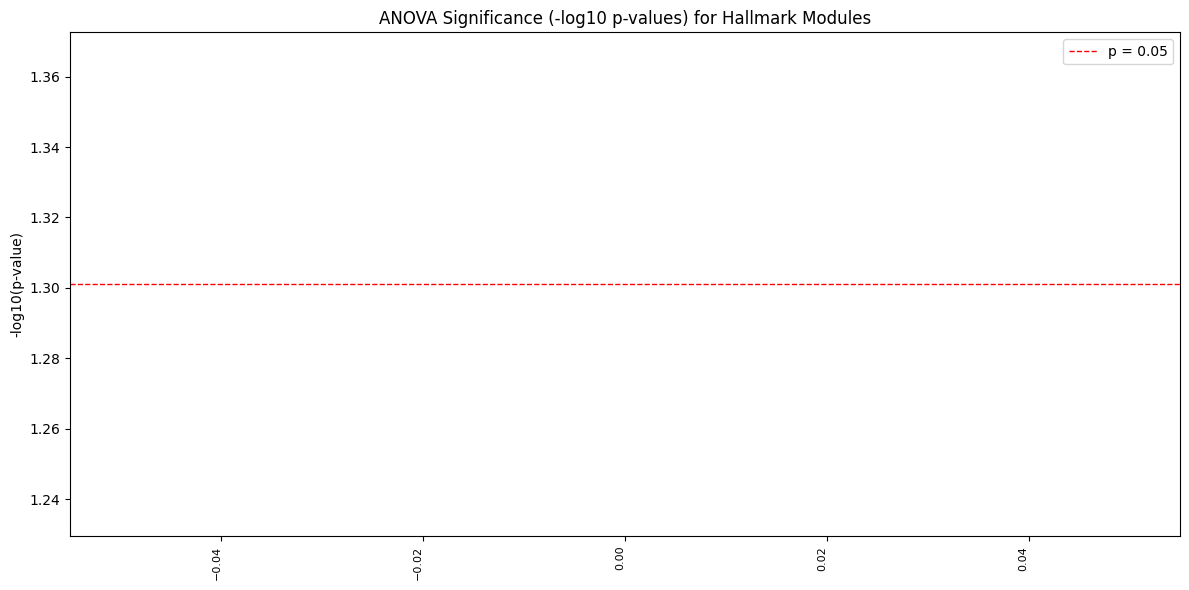

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
colors = sns.color_palette("viridis_r", len(anova_df))

plt.bar(anova_df["Module"], anova_df["neg_log10_p"], color=colors)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.ylabel("-log10(p-value)")
plt.title("ANOVA Significance (-log10 p-values) for Hallmark Modules")
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=1, label='p = 0.05')

plt.legend()
plt.tight_layout()
plt.show()

In [32]:
from scipy.stats import spearmanr

corr_results = []
df = pc1_df.drop("Samples", axis=1)
for col in df.columns.drop(["C_STAGE"]):
    corr, p_val = spearmanr(df[col], df["C_STAGE"])
    corr_results.append((col, corr, p_val))

corr_df = pd.DataFrame(corr_results, columns=["Module", "Spearman_corr", "p_value"])
corr_df["neg_log10_p"] = -np.log10(corr_df["p_value"])
corr_df.sort_values("Spearman_corr", ascending=False, inplace=True)

plt.figure(figsize=(8,5))
plt.yticks(fontsize=6.5)
plt.grid()
sns.barplot(data=corr_df, x="Spearman_corr", y="Module", palette="viridis")
plt.title("Hallmark Modules Associated with Cancer Stage")
plt.xlabel("Spearman Correlation with Stage")
plt.ylabel("")
plt.tight_layout()
plt.show()

KeyError: "['Samples'] not found in axis"